## Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from pathlib import Path
from fastai import *

In [3]:
data_path = Path('../data/herbs')
bs = 64

In [4]:
data_path.exists()

True

In [5]:
data_path.ls()

[PosixPath('../data/herbs/17'),
 PosixPath('../data/herbs/15'),
 PosixPath('../data/herbs/06'),
 PosixPath('../data/herbs/02'),
 PosixPath('../data/herbs/26'),
 PosixPath('../data/herbs/27'),
 PosixPath('../data/herbs/10'),
 PosixPath('../data/herbs/22'),
 PosixPath('../data/herbs/04'),
 PosixPath('../data/herbs/23'),
 PosixPath('../data/herbs/12'),
 PosixPath('../data/herbs/25'),
 PosixPath('../data/herbs/21'),
 PosixPath('../data/herbs/19'),
 PosixPath('../data/herbs/14'),
 PosixPath('../data/herbs/.DS_Store'),
 PosixPath('../data/herbs/13'),
 PosixPath('../data/herbs/24'),
 PosixPath('../data/herbs/20'),
 PosixPath('../data/herbs/09'),
 PosixPath('../data/herbs/28'),
 PosixPath('../data/herbs/01'),
 PosixPath('../data/herbs/models'),
 PosixPath('../data/herbs/18'),
 PosixPath('../data/herbs/29'),
 PosixPath('../data/herbs/03'),
 PosixPath('../data/herbs/11'),
 PosixPath('../data/herbs/._.DS_Store'),
 PosixPath('../data/herbs/05'),
 PosixPath('../data/herbs/08'),
 PosixPath('../data/

## Create Data

In [6]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=30, max_zoom=1.2)

In [7]:
data = ImageDataBunch.from_folder(data_path, train='.', 
                                  valid_pct=0.2, 
                                  ds_tfms=tfms, 
                                  size=224, bs=bs).normalize(imagenet_stats)

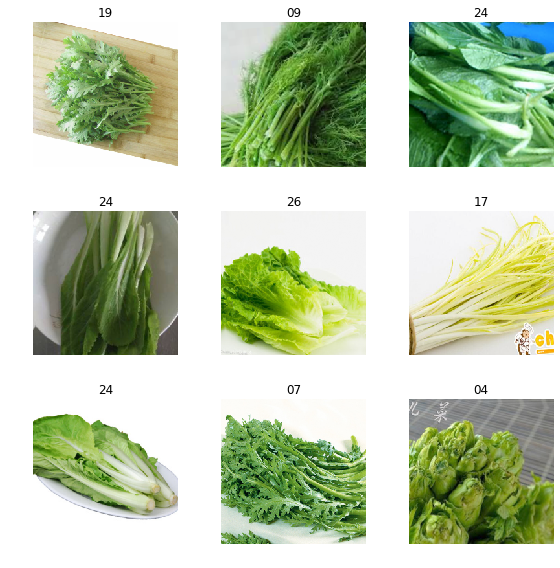

In [8]:
data.show_batch(rows=3, figsize=(8,8))

## Training: ResNet-50

In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [10]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


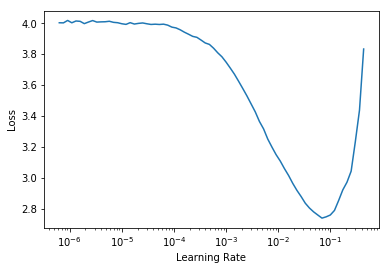

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(10)

Total time: 02:07
epoch  train_loss  valid_loss  error_rate
1      2.911469    1.698350    0.498753    (00:14)
2      1.925595    1.070519    0.331671    (00:12)
3      1.443323    0.934611    0.304239    (00:13)
4      1.134921    0.907055    0.289277    (00:12)
5      0.920680    0.801542    0.264339    (00:12)
6      0.734764    0.767858    0.251870    (00:12)
7      0.602695    0.735048    0.236908    (00:12)
8      0.494444    0.695310    0.226933    (00:12)
9      0.408223    0.686306    0.231920    (00:12)
10     0.365217    0.684881    0.224439    (00:12)



In [13]:
learn.save('resnet50-stage1')

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

Total time: 00:42
epoch  train_loss  valid_loss  error_rate
1      0.293537    0.680968    0.226933    (00:14)
2      0.297656    0.690785    0.231920    (00:13)
3      0.280711    0.686358    0.229426    (00:14)



## Analyze Results

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

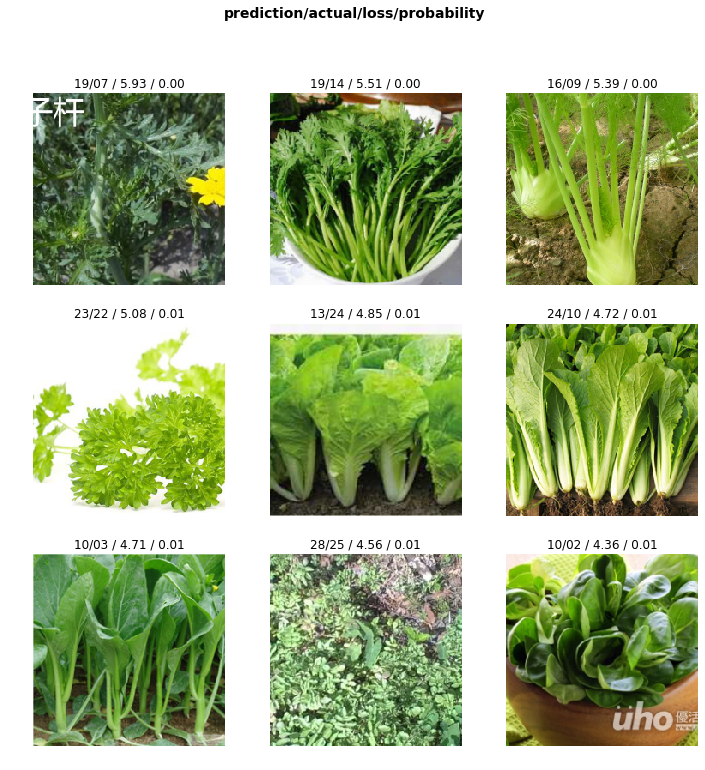

In [20]:
interp.plot_top_losses(9)

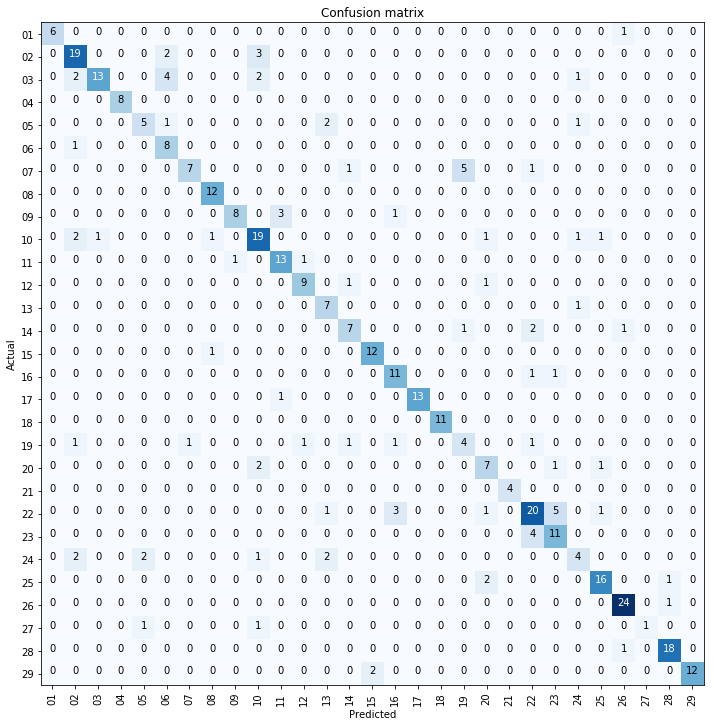

In [23]:
interp.plot_confusion_matrix(figsize=(10,10))

In [26]:
confused = interp.most_confused()

In [25]:
c_to_e = {
    '01': 'Chinese cabbage',
    '02': 'spinach',
    '03': 'choy sum',
    '04': 'ér cài\xa0',
    '05': 'leaf mustard',
    '06': 'Chinese broccoli',
    '07': 'Tricolor daisy',
    '08': 'huáng xīn cài\xa0',
    '09': 'fennel',
    '10': 'jī máo cài\xa0',
    '11': 'garlic chives',
    '12': 'water spinach',
    '13': 'kuài cài\xa0',
    '14': 'endive',
    '15': 'asparagus',
    '16': 'celery',
    '17': 'suàn huáng\xa0',
    '18': 'garlic shoots',
    '19': 'crown daisy',
    '20': 'pea shoots',
    '21': 'lettuce',
    '22': 'cilantro',
    '23': 'parsley',
    '24': 'bok choy',
    '25': 'watercress',
    '26': 'lettuce',
    '27': 'oilseed rape',
    '28': 'kale',
    '29': 'bamboo shoot',
}

In [27]:
confused

[('07', '19', 5),
 ('22', '23', 5),
 ('03', '06', 4),
 ('23', '22', 4),
 ('02', '10', 3),
 ('09', '11', 3),
 ('22', '16', 3),
 ('02', '06', 2),
 ('03', '02', 2),
 ('03', '10', 2),
 ('05', '13', 2),
 ('10', '02', 2),
 ('14', '22', 2),
 ('20', '10', 2),
 ('24', '02', 2),
 ('24', '05', 2),
 ('24', '13', 2),
 ('25', '20', 2),
 ('29', '15', 2)]

In [28]:
for i, e in enumerate(confused):
    confused[i] = (c_to_e[e[0]], c_to_e[e[1]], e[2])

Below: actual - predicted - number of mistakes

In [50]:
for e in confused:
    print(f'{e[0].rjust(16)} -> {e[1].ljust(18)} {e[2]}')

  Tricolor daisy -> crown daisy        5
        cilantro -> parsley            5
        choy sum -> Chinese broccoli   4
         parsley -> cilantro           4
         spinach -> jī máo cài         3
          fennel -> garlic chives      3
        cilantro -> celery             3
         spinach -> Chinese broccoli   2
        choy sum -> spinach            2
        choy sum -> jī máo cài         2
    leaf mustard -> kuài cài           2
     jī máo cài  -> spinach            2
          endive -> cilantro           2
      pea shoots -> jī máo cài         2
        bok choy -> spinach            2
        bok choy -> leaf mustard       2
        bok choy -> kuài cài           2
      watercress -> pea shoots         2
    bamboo shoot -> asparagus          2


## Conclusion

As we can see above, mostly the classifier gets confused on very similar greens. Examples:

- cilantro and parsley
- cilantro and celery
- choy sum and gai lan (Chinese broccoli
- tricolor daisy and crown daisy
- watercress and pea shoots

This is further set back by the fact that data is not of very high quality and not very big size.

At this point, I am satisfied with result (22% error rate, about 88 mistakes out of 401 validation examples) because the cost of acquiring more data is not very interesting to me for learning purposes.